In [5]:
#CS391Project
#Charlie, Ben, Jenna

In [6]:
#Requirments: CrashMaryland.csv is needed
#             Woodbine_2017_Crash.csv is needed

#Link to csv's: https://github.com/CS-391-Traffic/cs391traffic

#Takes about 1 min to run with grid search commented out (currently commented out)
#5 - 10 mins with grid search 

In [7]:
'''Description: Our data science project looks into the effects of weather on traffic flow and 
number of accidents. This project combines a weather dataset from NEWA and traffic dataset from 
Montgomery County Maryland to create a model to see the effects of weather on traffic flow and number of 
accidents over the duration of one year. The goals of this project was to see if our dataset supported the 
statistics stated by the US Department of Transportation and claims that the weather causes accidents made by 
popular media.


Summary: Our particular dataset showed no support for the popular claims and US statistics. However, we 
did find that the time of day affects the number of accidents and traffic flow. Overall the 
accuracy of our best model was around 73%. 

'''

'Description: Our data science project looks into the effects of weather on traffic flow and \nnumber of accidents. This project combines a weather dataset from NEWA and traffic dataset from \nMontgomery County Maryland to create a model to see the effects of weather on traffic flow and number of \naccidents over the duration of one year. The goals of this project was to see if our dataset supported the \nstatistics stated by the US Department of Transportation and claims that the weather causes accidents made by \npopular media.\n\n\nSummary: Our particular dataset showed no support for the popular claims and US statistics. However, we \ndid find that the time of day affects the number of accidents and traffic flow. Overall the \naccuracy of our best model was around 73%. \n\n'

In [8]:
import pandas as pd
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

In [9]:
#Reading in CSV Files
df = pd.read_csv('CrashMaryland.csv')
dfW = pd.read_csv('Woodbine_2017_Crash.csv')

In [10]:
#Setting cut-off dates for dataframe
date2017 = dt.datetime(2017, 1, 1, 0,0,0)
date2018 = dt.datetime(2017, 12, 31, 0,0,0)

In [11]:
#start of data preprocessing
df['date'] = pd.to_datetime(df['Crash Date/Time'])

dfW['Date/Time'] = dfW['Date/Time'].map(lambda x: str(x)[:-3]) 
dfW['date'] = pd.to_datetime(dfW['Date/Time'])

for i in range(len(df['date'])):
    df['date'].loc[i]= df['date'].loc[i].replace(minute=0)

C:\Users\Charlie\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#creating dataframe with dates only from 2017
df201718 = df.loc[df['date'] >= date2017]
mask = (df201718['date'] >= date2017) & (df201718['date'] <= date2018)
df2017 = df201718.loc[mask] 

In [13]:
#Converting some useful catagorical features
df2017['Weather'] = df2017['Weather'].astype('category')  
df2017['weatherCat'] = df2017['Weather'].cat.codes

df2017['Light'] = df2017['Light'].astype('category')  
df2017['lightCat'] = df2017['Light'].cat.codes

df2017['Surface Condition'] = df2017['Surface Condition'].astype('category')  
df2017['surfaceConditionCat'] = df2017['Surface Condition'].cat.codes

C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [14]:
#Merging weather to 2017 crash data
df2017W= pd.merge(df2017, dfW, on='date')

In [15]:
#Dataframe with number of crashes at certain hour of day
crashNum = df2017W['date'].value_counts().to_frame()
dfCW = dfW
dfCW.set_index('date', inplace = True)

In [16]:
#Joining number of crashes with weather table
dfCW = dfCW.join(crashNum, how = 'outer')
dfCW.fillna(0, inplace = True)

In [17]:
#creating column to show if a crash occured at a certain time
dfCW['crashOccur'] = dfCW['date'] != 0
dfCW.replace({True: 1, False: 0}, inplace=True)

dfCW['hours'] = dfCW.index.hour
dfCW.drop('Date/Time', axis = 1, inplace = True)

dfCW.to_csv('crashWeather.csv')

In [18]:
print("Done with pre-processing")
#Start pf EDA

Done with pre-processing


In [19]:
dfCW.describe()

,Air Temp (℉),Precip (inches),Leaf Wetness (minutes),RH (%),Wind Spd (mph),Wind Dir (degrees),date,crashOccur,hours
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,54.287032,0.003929,7.033562,65.916210,2.920342,221.289498,1.350114,0.650228,11.499886
std,17.537934,0.030234,18.578315,26.140309,2.727719,84.569478,1.453908,0.476925,6.922747
min,6.900000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,41.100000,0.000000,0.000000,51.000000,0.800000,145.000000,0.000000,0.000000,5.750000
50%,55.800000,0.000000,0.000000,69.000000,2.200000,246.000000,1.000000,1.000000,11.500000
75%,68.100000,0.000000,0.000000,87.000000,4.200000,288.000000,2.000000,1.000000,17.250000
max,95.100000,1.110000,60.000000,255.000000,19.600000,360.000000,13.000000,1.000000,23.000000


In [20]:
df2 = pd.read_csv("CrashMaryland.csv")

In [21]:
#Next few lines explore some of the value counts of features in crash data
df2['Route Type'].value_counts()

Maryland (State)        17859
County                  15059
Municipality             2481
US (State)               1668
Interstate (State)        790
Other Public Roadway      327
Government                229
Ramp                      178
Service Road               18
Unknown                     5
Name: Route Type, dtype: int64

In [22]:
df2['Road Name'].value_counts()

GEORGIA AVE                         2473
NEW HAMPSHIRE AVE                   1403
FREDERICK RD                        1291
ROCKVILLE PIKE                      1078
CONNECTICUT AVE                      933
VEIRS MILL RD                        884
COLUMBIA PIKE                        841
RANDOLPH RD                          791
COLESVILLE RD                        748
SHADY GROVE RD                       710
RIVER RD                             578
UNIVERSITY BLVD W                    556
UNIVERSITY BLVD E                    531
OLD GEORGETOWN RD                    527
NORBECK RD                           467
RIDGE RD                             460
GERMANTOWN RD                        436
DARNESTOWN RD                        406
WOODFIELD RD                         399
EISENHOWER MEMORIAL HWY              391
MONTGOMERY VILLAGE AVE               374
GREAT SENECA HWY                     354
CLOPPER RD                           349
QUINCE ORCHARD RD                    339
WISCONSIN AVE   

In [23]:
df2.columns.values

array(['Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Type', 'Cross-Street Name', 'Off-Road Description',
       'Municipality', 'Related Non-Motorist', 'At Fault',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'First Harmful Event',
       'Second Harmful Event', 'Fixed Oject Struck', 'Junction',
       'Intersection Type', 'Road Alignment', 'Road Condition',
       'Road Division', 'Latitude', 'Longitude', 'Location'], dtype=object)

In [24]:
df2['Weather'].value_counts()

CLEAR                       29322
RAINING                      5485
CLOUDY                       4561
SNOW                          481
UNKNOWN                       262
FOGGY                         184
WINTRY MIX                    143
OTHER                         100
SLEET                          63
SEVERE WINDS                   51
BLOWING SNOW                   51
BLOWING SAND, SOIL, DIRT        7
Name: Weather, dtype: int64

In [25]:
df2['Light'].value_counts()

DAYLIGHT                    29540
DARK LIGHTS ON              10004
DARK NO LIGHTS               1617
DUSK                         1046
DAWN                          910
DARK -- UNKNOWN LIGHTING      483
UNKNOWN                       306
OTHER                         112
Name: Light, dtype: int64

In [26]:
df2['Surface Condition'].value_counts()

DRY                       29055
WET                        7537
ICE                         392
SNOW                        346
UNKNOWN                     181
OTHER                        63
SLUSH                        59
MUD, DIRT, GRAVEL            22
WATER(STANDING/MOVING)       12
OIL                           5
SAND                          3
Name: Surface Condition, dtype: int64

In [27]:
#Creating dataframes to compare crashes during wet and dry conditions
dfSlip = df2.loc[(df2['Surface Condition'] == 'WET') | (df2['Surface Condition'] == 'ICE') | (df2['Surface Condition'] == 'SNOW')]
dfDry = df2.loc[(df2['Surface Condition'] == 'DRY')]

In [28]:
dfSlip.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Second Harmful Event,Fixed Oject Struck,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
18,MCP21070011,17000332,Montgomery County Police,Injury Crash,1/3/17 7:32,Maryland (State),CLOPPER RD,County,CINNAMON DR,NaN,...,NaN,NaN,INTERSECTION RELATED,T-INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.156108,-77.264519,"(39.15610804, -77.26451889)"
24,MCP2511000D,15000847,Montgomery County Police,Injury Crash,1/6/15 7:46,County,MONTGOMERY VILLAGE AVE,County,MEADOWCROFT LA,NaN,...,NaN,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,ONE-WAY TRAFFICWAY,39.184525,-77.198883,"(39.184525, -77.19888333)"
25,MCP1397000D,15064718,MONTGOMERY,Property Damage Crash,12/17/15 13:20,County,CRYSTAL ROCK DR,County,REXMORE DR,NaN,...,FIXED OBJECT,NaN,ALLEY,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.185134,-77.263977,"(39.18513379, -77.26397708)"
44,MCP2311000C,15039111,MONTGOMERY,Injury Crash,8/6/15 16:37,County,MONTGOMERY VILLAGE AVE,County,LAKE SHORE DR,NaN,...,NaN,NaN,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.170160,-77.194485,"(39.17016, -77.194485)"
48,MCP20810004,15006659,MONTGOMERY,Injury Crash,2/9/15 22:27,Maryland (State),W DIAMOND AVE,Municipality,FULKS CORNER AVE,NaN,...,NaN,GUARDRAIL OR BARRIER,NON INTERSECTION,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.141120,-77.197312,"(39.14112001, -77.19731212)"


In [29]:
dfSlip['date'] = pd.to_datetime(dfSlip['Crash Date/Time'])

dfSlip['date'] = dfSlip['date'].apply(lambda x: x.replace(minute=0))

dfSlip.head()


C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Fixed Oject Struck,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,date
18,MCP21070011,17000332,Montgomery County Police,Injury Crash,1/3/17 7:32,Maryland (State),CLOPPER RD,County,CINNAMON DR,NaN,...,NaN,INTERSECTION RELATED,T-INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.156108,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:00:00
24,MCP2511000D,15000847,Montgomery County Police,Injury Crash,1/6/15 7:46,County,MONTGOMERY VILLAGE AVE,County,MEADOWCROFT LA,NaN,...,NaN,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,ONE-WAY TRAFFICWAY,39.184525,-77.198883,"(39.184525, -77.19888333)",2015-01-06 07:00:00
25,MCP1397000D,15064718,MONTGOMERY,Property Damage Crash,12/17/15 13:20,County,CRYSTAL ROCK DR,County,REXMORE DR,NaN,...,NaN,ALLEY,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.185134,-77.263977,"(39.18513379, -77.26397708)",2015-12-17 13:00:00
44,MCP2311000C,15039111,MONTGOMERY,Injury Crash,8/6/15 16:37,County,MONTGOMERY VILLAGE AVE,County,LAKE SHORE DR,NaN,...,NaN,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.170160,-77.194485,"(39.17016, -77.194485)",2015-08-06 16:00:00
48,MCP20810004,15006659,MONTGOMERY,Injury Crash,2/9/15 22:27,Maryland (State),W DIAMOND AVE,Municipality,FULKS CORNER AVE,NaN,...,GUARDRAIL OR BARRIER,NON INTERSECTION,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.141120,-77.197312,"(39.14112001, -77.19731212)",2015-02-09 22:00:00


In [30]:
dfSlip['date'].value_counts()

2017-12-15 15:00:00    13
2016-02-02 08:00:00    12
2017-12-05 18:00:00    11
2015-11-10 17:00:00    11
2016-05-03 08:00:00    10
2016-11-30 17:00:00    10
2015-09-29 18:00:00     9
2015-02-15 09:00:00     9
2018-07-23 08:00:00     9
2015-12-02 17:00:00     9
2017-03-31 17:00:00     8
2016-02-02 07:00:00     8
2016-01-27 19:00:00     8
2017-10-11 18:00:00     8
2016-11-09 09:00:00     8
2015-09-30 08:00:00     8
2015-10-28 14:00:00     8
2015-12-23 17:00:00     8
2016-09-28 15:00:00     8
2016-12-06 17:00:00     8
2015-01-06 12:00:00     7
2017-12-15 18:00:00     7
2017-07-06 08:00:00     7
2016-06-03 17:00:00     7
2016-05-17 17:00:00     7
2016-09-01 09:00:00     7
2016-11-29 09:00:00     7
2015-05-27 16:00:00     7
2017-08-29 17:00:00     7
2015-05-21 12:00:00     7
                       ..
2017-05-23 05:00:00     1
2015-12-22 12:00:00     1
2017-01-12 07:00:00     1
2017-05-14 06:00:00     1
2017-05-05 12:00:00     1
2017-02-28 22:00:00     1
2015-03-14 13:00:00     1
2018-10-26 1

In [31]:
dfDry['date'] = pd.to_datetime(dfDry['Crash Date/Time'])

dfDry['date'] = dfDry['date'].apply(lambda x: x.replace(minute=0))

C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
dfDry['date'].value_counts()

2018-09-06 17:00:00    10
2017-12-13 17:00:00    10
2016-12-01 17:00:00    10
2016-10-18 08:00:00     9
2016-05-19 17:00:00     9
2017-11-20 17:00:00     9
2015-05-28 15:00:00     9
2015-09-11 15:00:00     9
2016-11-08 17:00:00     9
2015-11-24 15:00:00     8
2016-11-07 08:00:00     8
2015-06-02 17:00:00     8
2016-06-02 16:00:00     8
2017-05-02 17:00:00     8
2015-07-20 17:00:00     8
2015-12-03 08:00:00     8
2016-10-05 15:00:00     8
2015-05-19 18:00:00     8
2016-08-19 16:00:00     8
2015-12-21 17:00:00     8
2016-06-24 15:00:00     8
2018-03-14 16:00:00     7
2015-09-16 09:00:00     7
2016-02-19 07:00:00     7
2017-09-19 16:00:00     7
2017-03-09 16:00:00     7
2015-05-16 12:00:00     7
2016-01-12 17:00:00     7
2018-10-10 15:00:00     7
2017-03-08 17:00:00     7
                       ..
2018-07-16 15:00:00     1
2017-08-12 10:00:00     1
2016-06-21 10:00:00     1
2017-08-21 09:00:00     1
2017-06-28 08:00:00     1
2017-08-30 08:00:00     1
2017-09-09 07:00:00     1
2018-07-23 1

In [33]:
print('Slip Road Cond')
dfSlip['date'].value_counts().describe()

Slip Road Cond


count    4433.000000
mean        1.866682
std         1.298101
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: date, dtype: float64

In [34]:
print('Dry Road Cond')
dfDry['date'].value_counts().describe()

Dry Road Cond


count    16278.000000
mean         1.784924
std          1.082685
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: date, dtype: float64

In [35]:
dfSlip['Road Name'].value_counts()

GEORGIA AVE                                 426
NEW HAMPSHIRE AVE                           246
FREDERICK RD                                232
ROCKVILLE PIKE                              203
RANDOLPH RD                                 199
CONNECTICUT AVE                             184
VEIRS MILL RD                               172
COLUMBIA PIKE                               162
SHADY GROVE RD                              144
COLESVILLE RD                               119
CAPITAL BELTWAY                             118
OLD GEORGETOWN RD                           112
GERMANTOWN RD                               110
UNIVERSITY BLVD E                           106
RIDGE RD                                    106
RIVER RD                                    102
EISENHOWER MEMORIAL HWY                     101
UNIVERSITY BLVD W                            95
WOODFIELD RD                                 86
MONTGOMERY VILLAGE AVE                       83
CLOPPER RD                              

In [36]:
#Adding column to df2 so rush hour can be investigated
df2['date'] = pd.to_datetime(df2['Crash Date/Time'])
df2.head()
df2['hour'] = df2['date'].map(lambda x: x.hour)

In [37]:
#Rush Hour dataframe
dfRush = df2.loc[(df2['hour'] == 7) | (df2['hour'] == 8) | (df2['hour'] == 9)]
dfRush.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Junction,Intersection Type,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location,date,hour
10,MCP2286000Q,15050573,MONTGOMERY,Property Damage Crash,10/6/15 8:59,County,PINEY MEETINGHOUSE RD,County,GLEN RD,NaN,...,INTERSECTION,FOUR-WAY INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.048458,-77.233057,"(39.04845833, -77.23305667)",2015-10-06 08:59:00,8
18,MCP21070011,17000332,Montgomery County Police,Injury Crash,1/3/17 7:32,Maryland (State),CLOPPER RD,County,CINNAMON DR,NaN,...,INTERSECTION RELATED,T-INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.156108,-77.264519,"(39.15610804, -77.26451889)",2017-01-03 07:32:00,7
24,MCP2511000D,15000847,Montgomery County Police,Injury Crash,1/6/15 7:46,County,MONTGOMERY VILLAGE AVE,County,MEADOWCROFT LA,NaN,...,NON INTERSECTION,NaN,STRAIGHT,NO DEFECTS,ONE-WAY TRAFFICWAY,39.184525,-77.198883,"(39.184525, -77.19888333)",2015-01-06 07:46:00,7
28,MCP2726001L,16059838,Montgomery County Police,Injury Crash,11/21/16 9:01,Maryland (State),FALLS RD,Ramp,RAMP 5 FR RAMP 8 (FR IS270) TO MD 189 EB,NaN,...,INTERCHANGE RELATED,NaN,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.074543,-77.163878,"(39.07454333, -77.16387833)",2016-11-21 09:01:00,9
31,MCP2450000S,16043946,Montgomery County Police,Injury Crash,8/29/16 9:30,Maryland (State),NEW HAMPSHIRE AVE,County,NORTHAMPTON DR,NaN,...,INTERSECTION RELATED,T-INTERSECTION,STRAIGHT,NO DEFECTS,OTHER,39.006182,-76.980595,"(39.00618167, -76.980595)",2016-08-29 09:30:00,9


In [38]:
dfRush['date'] = dfRush['date'].apply(lambda x: x.replace(minute=0))
dfRush['date'].value_counts().describe()

C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    3167.000000
mean        2.366593
std         1.477712
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: date, dtype: float64

In [39]:
df2['date'] = df2['date'].apply(lambda x: x.replace(minute=0))
df2['date'].value_counts().describe()

count    21503.000000
mean         2.063852
std          1.310847
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: date, dtype: float64

In [40]:
#Looking at night time rush hour now
dfRushNight = df2.loc[(df2['hour'] == 16) | (df2['hour'] == 17) | (df2['hour'] == 18)]


In [41]:
#Higer mean
dfRushNight['date'].value_counts().describe()

count    3651.000000
mean        2.629964
std         1.585126
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: date, dtype: float64

In [42]:
#Creating dataframes to compare crashes during different road
#conditions during rush hour
dfSlipRN = dfRushNight.loc[(dfRushNight['Surface Condition'] == 'WET') | (dfRushNight['Surface Condition'] == 'ICE') | (dfRushNight['Surface Condition'] == 'SNOW')]
dfDryRN = dfRushNight.loc[(dfRushNight['Surface Condition'] == 'DRY')]

In [43]:
dfSlipRN['date'].value_counts().describe()

count    713.000000
mean       2.301543
std        1.637074
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: date, dtype: float64

In [44]:
#Very similar
dfDryRN['date'].value_counts().describe()

count    2954.000000
mean        2.203114
std         1.338954
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: date, dtype: float64

In [45]:
#creating lists of means and counts of crashes at different times
#so vizualizations can be created
descList = []
for i in range(24):
    dfI = df2.loc[(df2['hour'] == i)]
    descList.append(dfI['date'].value_counts().describe())

meanList = []
for i in range(len(descList)):
    meanList.append(descList[i][1])
    
    
countList = []
for i in range(len(descList)):
    countList.append(descList[i][0])

Text(0.5, 1.0, 'Average Number of Crashes based on Time of Day')

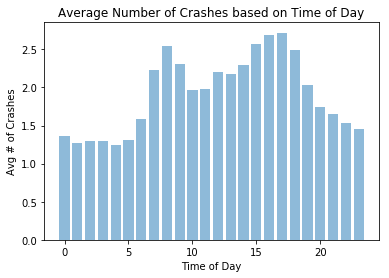

In [46]:
#Chart showimg mean crashes throughout day
import matplotlib.pyplot as plt

plt.bar(range(len(meanList)), meanList, align='center', alpha=0.5)
plt.ylabel('Avg # of Crashes')
plt.xlabel('Time of Day')
plt.title('Average Number of Crashes based on Time of Day')

Text(0.5, 1.0, 'Number of Crashes based on Time of Day')

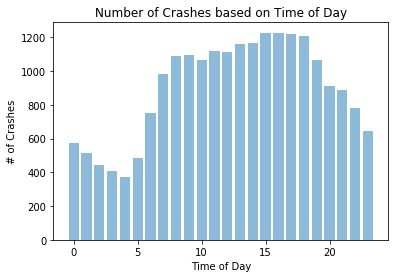

In [47]:
#Chart showing total crashes at each hour
plt.bar(range(len(countList)), countList, align='center', alpha=0.5)
plt.ylabel('# of Crashes')
plt.xlabel('Time of Day')
plt.title('Number of Crashes based on Time of Day')

In [48]:
print('Done with EDA')
#Start of primary analysis and predictive modeling.

Done with EDA


In [49]:
#Training and Splitting Data
X = dfCW[['Air Temp (℉)', 'Precip (inches)', 'Wind Spd (mph)', 'RH (%)', 'Leaf Wetness (minutes)', 'hours']]
Y = dfCW['crashOccur']

Xl = dfCW[['Air Temp (℉)']]
Yl = dfCW['date']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

In [50]:
#Random Forest Classifier 
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of Forest:",metrics.accuracy_score(y_test, y_pred))
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
cvForest = model_selection.cross_val_score(RandomForestClassifier(), X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (cvForest.mean()))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(feature_importances)

Accuracy of Forest: 0.676179604261796


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest

10-fold cross validation average accuracy: 0.687
              precision    recall  f1-score   support

           0       0.54      0.51      0.53       929
           1       0.74      0.77      0.75      1699

   micro avg       0.68      0.68      0.68      2628
   macro avg       0.64      0.64      0.64      2628
weighted avg       0.67      0.68      0.67      2628

[[ 477  452]
 [ 399 1300]]
                        importance
Air Temp (℉)              0.291574
hours                     0.256899
Wind Spd (mph)            0.208303
RH (%)                    0.202675
Leaf Wetness (minutes)    0.025634
Precip (inches)           0.014915


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
#logistic regression
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Optimization terminated successfully.
         Current function value: 0.612314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             crashOccur   No. Observations:                 8760
Model:                          Logit   Df Residuals:                     8754
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:                 0.05406
Time:                        23:56:33   Log-Likelihood:                -5363.9
converged:                       True   LL-Null:                       -5670.4
                                        LLR p-value:                3.074e-130
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Air Temp (℉)               0.0082      0.001      6.900      0.000       0.006      

In [52]:
#BernoulliNB
clf=BernoulliNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy of BernoulliNB:",metrics.accuracy_score(y_test, y_pred))
cvB = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (cvB.mean()))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of BernoulliNB: 0.6582952815829528


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

10-fold cross validation average accuracy: 0.686
              precision    recall  f1-score   support

           0       0.56      0.16      0.25       929
           1       0.67      0.93      0.78      1699

   micro avg       0.66      0.66      0.66      2628
   macro avg       0.61      0.55      0.52      2628
weighted avg       0.63      0.66      0.59      2628

[[ 152  777]
 [ 121 1578]]


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [53]:
#GaussianNB
clf2=GaussianNB()
clf2.fit(X_train,y_train)
y_pred=clf2.predict(X_test)
print("Accuracy of GaussianNB:",metrics.accuracy_score(y_test, y_pred))
cvG = model_selection.cross_val_score(GaussianNB(), X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (cvG.mean()))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of GaussianNB: 0.6095890410958904
10-fold cross validation average accuracy: 0.611
              precision    recall  f1-score   support

           0       0.47      0.71      0.56       929
           1       0.78      0.55      0.65      1699

   micro avg       0.61      0.61      0.61      2628
   macro avg       0.62      0.63      0.61      2628
weighted avg       0.67      0.61      0.62      2628

[[663 266]
 [760 939]]


In [54]:
#MLP Classifier
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier()
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)
predictTrain = mlp.predict(X_train)
probs =  mlp.predict_proba(X_test)


print("Accuracy of MLPClassifier training data:",metrics.accuracy_score(y_train, predictTrain))
print("Accuracy of MLPClassifier test data:",metrics.accuracy_score(y_test, predictions))

print('Train Report')
print(classification_report(y_train, predictTrain))

print('Test Report')
print(classification_report(y_test,predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
cvMLP = model_selection.cross_val_score(MLPClassifier(), X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (cvMLP.mean()))

C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Charlie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy of MLPClassifier training data: 0.7374429223744292
Accuracy of MLPClassifier test data: 0.7149923896499238
Train Report
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      2135
           1       0.78      0.84      0.81      3997

   micro avg       0.74      0.74      0.74      6132
   macro avg       0.71      0.69      0.70      6132
weighted avg       0.73      0.74      0.73      6132

Test Report
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       929
           1       0.76      0.82      0.79      1699

   micro avg       0.71      0.71      0.71      2628
   macro avg       0.69      0.67      0.68      2628
weighted avg       0.71      0.71      0.71      2628

[[ 483  446]
 [ 303 1396]]


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, 

10-fold cross validation average accuracy: 0.725


C:\Users\Charlie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
'''#MLPClassifier Grid Search - takes long time to run
params = [ {'hidden_layer_sizes': [(100,), (50,), (25,), (200,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': [0.0001,0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]} ]

grid = GridSearchCV(mlp, params, cv=4)            # cv: number of folds
grid.fit(X_train, y_train)
grid.best_estimator_
scores = grid.cv_results_
scores['mean_test_score']''' 


"#MLPClassifier Grid Search - takes long time to run\nparams = [ {'hidden_layer_sizes': [(100,), (50,), (25,), (200,)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': [0.0001,0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]} ]\n\ngrid = GridSearchCV(mlp, params, cv=4)            # cv: number of folds\ngrid.fit(X_train, y_train)\ngrid.best_estimator_\nscores = grid.cv_results_\nscores['mean_test_score']"

In [56]:
#print(grid.best_estimator_)